### Denetimsiz Öğrenme (Unsupervised Learning)

Eğer problemde bir bağımlı değişken yoksa bunlara gözetimsiz öğrenme modelleri denir.

Bu bölümde 3 farklı yaklaşım ön plana çıkar:
1. K-Ortalamalar (K-Means)
2. Hiyerarşik Kümeleme Analizi (Hierarchical Cluster Analysis)
3. Temel Bileşen Analizi (Principal Component Analysis)

##### 1. K-Ortalamalar (K-Means)

<b>Adım 1:</b> Küme sayısı belirlenir.

<b>Adım 2:</b> Rastgele k merkez seçilir.

<b>Adım 3:</b> Her bir gözlem için k merkezlere olan uzaklıklar hesaplanır.

<b>Adım 4:</b> Her gözlem en yakın olduğu merkeze atanır. Küme oluşur.

<b>Adım 5:</b> Kümeler için tekrar merkez hesaplamaları yapılır.

<b>Adım 6:</b> Bu işlem belirlenen bir iterasyon sayısınca tekrar edilir ve küme içi hata kareler toplamının (total within cluster variation) minimum olduğu durumdaki gözlemlerin kümelenme yapısı nihai kümelenme olarak seçilir.


In [62]:
#!pip install yellowbrick

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler,LabelEncoder
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, GridSearchCV

In [64]:
df = pd.read_csv("USArrests.csv", index_col=0)

In [65]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [66]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [68]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


In [69]:
sc = MinMaxScaler((0,1))

In [70]:
df = sc.fit_transform(df)

In [71]:
df[0:5]

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512]])

In [72]:
kmeans = KMeans(n_clusters=4,random_state=17).fit(df) # n_clusters = k sayısı (merkez)

In [73]:
kmeans.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 4,
 'n_init': 10,
 'random_state': 17,
 'tol': 0.0001,
 'verbose': 0}

In [74]:
kmeans.n_clusters

4

In [75]:
kmeans.cluster_centers_

array([[0.1686747 , 0.11485774, 0.34028683, 0.12601868],
       [0.6124498 , 0.75      , 0.75423729, 0.67980189],
       [0.30439405, 0.32937147, 0.70588235, 0.31098951],
       [0.79141566, 0.6802226 , 0.36864407, 0.36466408]])

In [76]:
kmeans.labels_

array([3, 1, 1, 3, 1, 1, 2, 2, 1, 3, 2, 0, 1, 2, 0, 2, 0, 3, 0, 1, 2, 1,
       0, 3, 2, 0, 0, 1, 0, 2, 1, 1, 3, 0, 2, 2, 2, 2, 2, 3, 0, 3, 1, 2,
       0, 2, 2, 0, 0, 2])

In [77]:
kmeans.inertia_

3.683456153585913

In [78]:
# Optimum küme sayısını belirleme

In [79]:
kmeans = KMeans()

In [80]:
ssd = []

In [81]:
K = range(1,30)

In [82]:
for k in K:
    kmeans = KMeans(n_clusters=k).fit(df)
    ssd.append(kmeans.inertia_)

In [83]:
ssd

[13.184122550256445,
 6.596893867946196,
 5.010878493006417,
 3.683456153585913,
 3.223208055249011,
 2.8447542871840574,
 2.553551365789129,
 2.313673925093363,
 2.1083461768966116,
 1.8220635258917568,
 1.6918499348559022,
 1.578896695216347,
 1.4487496233225805,
 1.2932081467960925,
 1.219464515405147,
 1.1981555357367104,
 1.0418247439036907,
 1.0163498607095174,
 0.9180141727937977,
 0.811093876565645,
 0.7927822425877272,
 0.7345567330788125,
 0.6874088752053289,
 0.6469555200646674,
 0.5736664924824298,
 0.5666294999744025,
 0.49999845073841526,
 0.4171468963354147,
 0.38009223537696946]

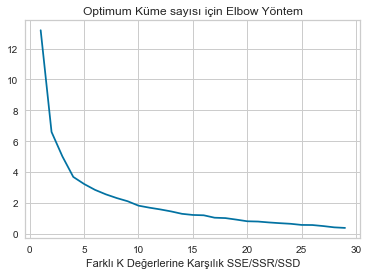

In [84]:
plt.plot(K,ssd,"bx-")
plt.xlabel("Farklı K Değerlerine Karşılık SSE/SSR/SSD")
plt.title("Optimum Küme sayısı için Elbow Yöntem")
plt.show()

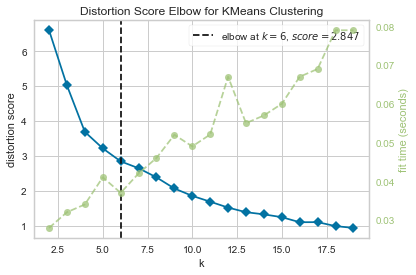

In [85]:
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2,20))
elbow.fit(df)
elbow.show();

In [86]:
elbow.elbow_value_

6

In [87]:
# Final Cluster'ların Oluşturuluması

In [88]:
kmeans = KMeans(n_clusters=elbow.elbow_value_).fit(df)

In [89]:
kmeans.n_clusters


6

In [90]:
kmeans.cluster_centers_

array([[0.37700803, 0.36957763, 0.56073446, 0.35400517],
       [0.13805221, 0.10616438, 0.34039548, 0.1171404 ],
       [0.63788487, 0.77283105, 0.71563089, 0.60953201],
       [0.2383821 , 0.268591  , 0.84503632, 0.2266519 ],
       [0.83562823, 0.70645793, 0.37772397, 0.37172388],
       [0.53614458, 0.68150685, 0.8700565 , 0.89061154]])

In [91]:
kmeans.labels_

array([4, 2, 2, 0, 5, 5, 3, 0, 2, 4, 3, 1, 2, 0, 1, 0, 0, 4, 1, 2, 3, 2,
       1, 4, 0, 1, 1, 5, 1, 3, 2, 2, 4, 1, 0, 0, 0, 3, 3, 4, 1, 4, 2, 3,
       1, 0, 0, 1, 1, 0])

In [92]:
df[0:5]

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512]])

In [93]:
clusters_kmeans = kmeans.labels_

In [94]:
df = pd.read_csv("USArrests.csv", index_col=0)

In [95]:
df["cluster"]=clusters_kmeans+1

In [96]:
df.head()

,Murder,Assault,UrbanPop,Rape,cluster
Alabama,13.2,236,58,21.2,5
Alaska,10.0,263,48,44.5,3
Arizona,8.1,294,80,31.0,3
Arkansas,8.8,190,50,19.5,1
California,9.0,276,91,40.6,6


In [97]:
df[df["cluster"] == 1]

,Murder,Assault,UrbanPop,Rape,cluster
Arkansas,8.8,190,50,19.5,1
Delaware,5.9,238,72,15.8,1
Indiana,7.2,113,65,21.0,1
Kansas,6.0,115,66,18.0,1
Kentucky,9.7,109,52,16.3,1
Missouri,9.0,178,70,28.2,1
Ohio,7.3,120,75,21.4,1
Oklahoma,6.6,151,68,20.0,1
Oregon,4.9,159,67,29.3,1
Virginia,8.5,156,63,20.7,1


In [98]:
df[df["cluster"] == 5]

,Murder,Assault,UrbanPop,Rape,cluster
Alabama,13.2,236,58,21.2,5
Georgia,17.4,211,60,25.8,5
Louisiana,15.4,249,66,22.2,5
Mississippi,16.1,259,44,17.1,5
North Carolina,13.0,337,45,16.1,5
South Carolina,14.4,279,48,22.5,5
Tennessee,13.2,188,59,26.9,5


In [99]:
df.groupby("cluster").agg(["count","mean","median"])

Murder                   Assault                    UrbanPop  \
         count       mean median   count        mean median    count   
cluster                                                                
1           12   7.058333    7.0      12  152.916667  153.5       12   
2           12   3.091667    2.6      12   76.000000   76.5       12   
3            9  11.388889   11.3       9  270.666667  263.0        9   
4            7   4.757143    4.4       7  123.428571  120.0        7   
5            7  14.671429   14.4       7  251.285714  249.0        7   
6            3   9.700000    9.0       3  244.000000  252.0        3   

                           Rape                    
              mean median count       mean median  
cluster                                            
1        65.083333   66.5    12  21.000000  20.35  
2        52.083333   53.5    12  11.833333  11.25  
3        74.222222   80.0     9  30.888889  31.00  
4        81.857143   83.0     7  16.071429  16.30  
5        54.285714   58.0     7  21.685714  22.20  
6        83.333333   81.0     3  41.766667  40.60

In [100]:
df.to_csv("clusters.csv")

### Hiyerarşik Kümeleme Analizi 

Amaç gözlemleri birbirilerine olan benzerliklerine göre alt kümelere ayırmaktır.

In [101]:
df = pd.read_csv("USArrests.csv", index_col=0)

In [102]:
sc = MinMaxScaler((0,1))
df = sc.fit_transform(df)

In [103]:
hc_average = linkage(df,"average")

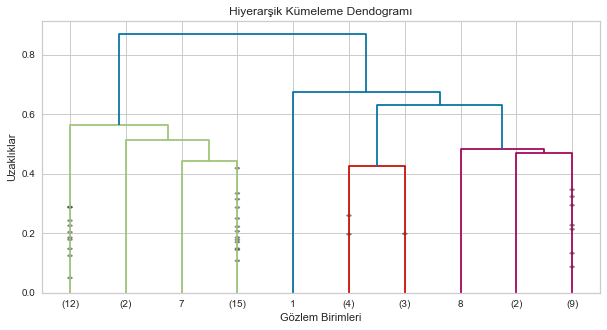

In [104]:
plt.figure(figsize=(10,5))
plt.title("Hiyerarşik Kümeleme Dendogramı")
plt.xlabel('Gözlem Birimleri')
plt.ylabel("Uzaklıklar")
dendrogram(hc_average,
            truncate_mode='lastp',
            p=10,
            show_contracted=True,
            leaf_font_size=10)
plt.show()

In [105]:
# Küme sayısını belirlemek

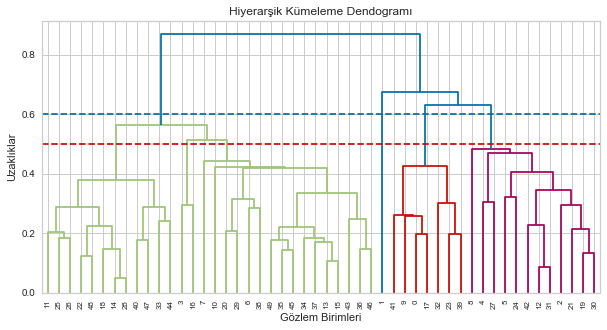

In [106]:
plt.figure(figsize=(10,5))
plt.title("Hiyerarşik Kümeleme Dendogramı")
plt.xlabel('Gözlem Birimleri')
plt.ylabel("Uzaklıklar")
dendrogram(hc_average)
plt.axhline(y=0.5,color='r',linestyle='--')
plt.axhline(y=0.6,color='b',linestyle='--')
plt.show()

In [107]:
# Final modeli oluşturmak

In [108]:
from sklearn.cluster import AgglomerativeClustering

In [109]:
cluster = AgglomerativeClustering(n_clusters=5,linkage="average")

In [110]:
clusters = cluster.fit_predict(df)

In [111]:
clusters

array([3, 2, 1, 0, 1, 1, 0, 0, 1, 3, 0, 4, 1, 0, 4, 0, 0, 3, 4, 1, 0, 1,
       4, 3, 1, 4, 4, 1, 4, 0, 1, 1, 3, 4, 0, 0, 0, 0, 0, 3, 4, 3, 1, 0,
       4, 0, 0, 4, 4, 0], dtype=int64)

In [112]:
df = pd.read_csv("USArrests.csv", index_col=0)

In [113]:
df["hi_cluster_no"] = clusters +1

In [114]:
df.head()

,Murder,Assault,UrbanPop,Rape,hi_cluster_no
Alabama,13.2,236,58,21.2,4
Alaska,10.0,263,48,44.5,3
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,1
California,9.0,276,91,40.6,2


In [116]:
df["kmeans_cluster_no"] = clusters_kmeans

In [117]:
df

,Murder,Assault,UrbanPop,Rape,hi_cluster_no,kmeans_cluster_no
Alabama,13.2,236,58,21.2,4,4
Alaska,10.0,263,48,44.5,3,2
Arizona,8.1,294,80,31.0,2,2
Arkansas,8.8,190,50,19.5,1,0
California,9.0,276,91,40.6,2,5
Colorado,7.9,204,78,38.7,2,5
Connecticut,3.3,110,77,11.1,1,3
Delaware,5.9,238,72,15.8,1,0
Florida,15.4,335,80,31.9,2,2
Georgia,17.4,211,60,25.8,4,4


### Temel Bileşen Analizi (PCA)

Temel fikir, çok değişkenli verinin ana özelliklerini daha az sayıda değişken/bileşen ile temsil etmektir.

Diğer bir ifadeyle: Küçük miktarda bilgi kaybını göze alarak değişken boyutunu azaltmaktır.

In [118]:
# Principal Component Analysis

df = pd.read_csv("hitters.csv")
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [119]:
# Maaşla ve kategorik değişkenlerle ilgilenmiyorum.
num_cols = [col for col in df.columns if df[col].dtypes != "O" and "Salary" not in col]

In [120]:
num_cols

['AtBat',
 'Hits',
 'HmRun',
 'Runs',
 'RBI',
 'Walks',
 'Years',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRuns',
 'CRBI',
 'CWalks',
 'PutOuts',
 'Assists',
 'Errors']

In [121]:
df[num_cols].head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4


In [122]:
df = df[num_cols]

In [123]:
df.dropna(inplace=True)

In [124]:
df.shape

(322, 16)

In [125]:
df = StandardScaler().fit_transform(df)

In [126]:
pca = PCA()

In [127]:
pca_fit = pca.fit_transform(df)

In [128]:
pca.explained_variance_ratio_

array([4.60378552e-01, 2.60398491e-01, 1.03388605e-01, 5.36902121e-02,
       4.20784091e-02, 2.96359092e-02, 1.57079101e-02, 1.13928108e-02,
       7.83230398e-03, 5.87669497e-03, 3.74765194e-03, 3.09384056e-03,
       1.55679403e-03, 8.59034766e-04, 2.86873704e-04, 7.59064046e-05])

In [130]:
np.cumsum(pca.explained_variance_ratio_) # AWESOME

array([0.46037855, 0.72077704, 0.82416565, 0.87785586, 0.91993427,
       0.94957018, 0.96527809, 0.9766709 , 0.9845032 , 0.9903799 ,
       0.99412755, 0.99722139, 0.99877819, 0.99963722, 0.99992409,
       1.        ])

In [131]:
##############################
# Optimum Bileşen Sayısı
##############################

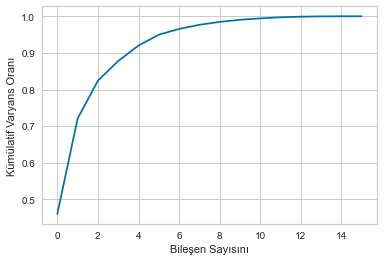

In [132]:
pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Bileşen Sayısını")
plt.ylabel("Kümülatif Varyans Oranı")
plt.show()

In [133]:
pca = PCA(n_components=3)

In [134]:
pca_fit = pca.fit_transform(df)

In [135]:
pca.explained_variance_ratio_

array([0.46037855, 0.26039849, 0.1033886 ])

In [136]:
np.cumsum(pca.explained_variance_ratio_)

array([0.46037855, 0.72077704, 0.82416565])

In [137]:
##############################
# Bonus: Principal Component Analysis
##############################

In [138]:
df = pd.read_csv("hitters.csv")

In [142]:
df.shape

(322, 20)

In [143]:
len(pca_fit)

322

In [144]:
# Maaşla ve kategorik değişkenlerle ilgilenmiyorum.
num_cols = [col for col in df.columns if df[col].dtypes != "O" and "Salary" not in col]

In [145]:
len(num_cols)

16

In [146]:
others = [col for col in df.columns if col not in num_cols]

In [147]:
others

['League', 'Division', 'Salary', 'NewLeague']

In [148]:
pd.DataFrame(pca_fit,columns=["PC1","PC2","PC3"]).head()

,PC1,PC2,PC3
0,-3.240106,-0.253173,0.776066
1,0.245488,1.302951,0.118040
2,0.603883,-2.617002,-0.698183
3,3.591276,0.547821,-1.049022
4,-2.264528,-0.698898,-1.290536


In [149]:
final_df = pd.concat([pd.DataFrame(pca_fit,columns=["PC1","PC2","PC3"]),df[others]],axis=1)

In [150]:
final_df.head()

,PC1,PC2,PC3,League,Division,Salary,NewLeague
0,-3.240106,-0.253173,0.776066,A,E,NaN,A
1,0.245488,1.302951,0.118040,N,W,475.0,N
2,0.603883,-2.617002,-0.698183,A,W,480.0,A
3,3.591276,0.547821,-1.049022,N,E,500.0,N
4,-2.264528,-0.698898,-1.290536,N,E,91.5,N


In [151]:
from sklearn.linear_model import LinearRegression

In [153]:
from sklearn.tree import DecisionTreeRegressor

In [156]:
# Label encoding için fonksiyon
def label_encoder(dataframe,binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [157]:
from cProfile import label


for col in ["NewLeague","Division","League"]:
    label_encoder(final_df,col)

In [158]:
final_df.dropna(inplace=True)

In [159]:
y = final_df["Salary"]
X = final_df.drop(["Salary"],axis=1)

In [160]:
lm = LinearRegression()

In [161]:
rmse = np.mean(np.sqrt(-cross_val_score(lm,X,y,scoring="neg_mean_squared_error",cv=5)))

In [162]:
rmse

345.6021106351967

In [163]:
y.mean()

535.9258821292775

In [164]:
cart = DecisionTreeRegressor()

In [165]:
rmse = np.mean(np.sqrt(-cross_val_score(cart,X,y,scoring="neg_mean_squared_error",cv=5)))

In [166]:
rmse

387.1571896327184

In [168]:
cart_params = {"max_depth":range(1,11),
               "min_samples_split":range(2,20)}

In [169]:
# GridSearchCV
cart_best_grid = GridSearchCV(cart,cart_params,cv=5,n_jobs=-1,verbose=True).fit(X,y)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


In [171]:
cart_final = DecisionTreeRegressor(**cart_best_grid.best_params_,random_state=17).fit(X,y)

In [172]:
rmse = np.mean(np.sqrt(-cross_val_score(cart_final,X,y,scoring="neg_mean_squared_error",cv=5)))

In [173]:
rmse

330.1964109339104